In [59]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

In [60]:
df = pd.read_csv("StudentPerformanceFactors.csv")
print(df.head(2))

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Ne

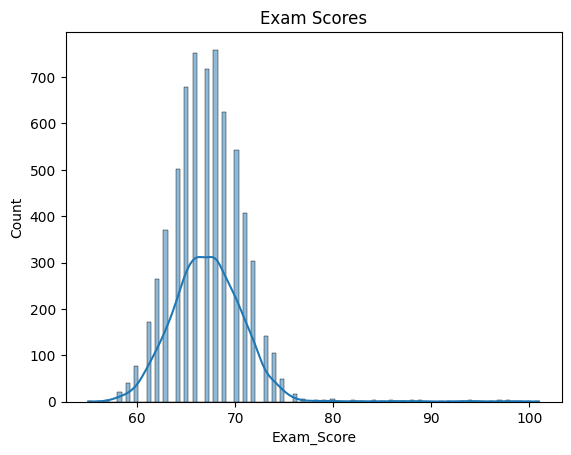

In [61]:
sns.histplot(df["Exam_Score"], kde = True)
plt.title("Exam Scores")
plt.show()

## Preprocesing 

In [62]:
print(df.isnull().sum())
print(df["Motivation_Level"].unique())


df["Parental_Involvement"] = df["Parental_Involvement"].map({"Low": 0, "Medium": 1, "High": 2})
df["Access_to_Resources"] = df["Access_to_Resources"].map({"Low": 0, "Medium": 1, "High": 2})
df["Extracurricular_Activities"] = df["Extracurricular_Activities"].map({"Yes": 1, "No": 0})
df["Motivation_Level"] = df["Motivation_Level"].map({"Low": 0, "Medium": 1, "High": 2})
df["Internet_Access"] = df["Internet_Access"].map({"Yes": 1, "No": 0})
df["Teacher_Quality"] = df["Teacher_Quality"].map({"Low": 0, "Medium": 1, "High": 2})
df["School_Type"] = df["School_Type"].map({"Public": 0, "Private": 1})
df["Peer_Influence"] = df["Peer_Influence"].map({"Positive": 0, "Negative": 1, "Neutral": 2})
df["Learning_Disabilities"] = df["Learning_Disabilities"].map({"Yes": 1, "No": 0})
df["Parental_Education_Level"] = df["Parental_Education_Level"].map({"High School": 0, "College": 1, "Postgraduate": 2})
df["Distance_from_Home"] = df["Distance_from_Home"].map({"Near": 0, "Moderate": 1, "Far": 2})
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df["Family_Income"] = df["Family_Income"].map({"Low": 0, "Medium": 1, "High": 2})

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
['Low' 'Medium' 'High']


In [63]:
result = pd.DataFrame({
    'feature1': [True, True, False],
    'feature2': [True, False, True]
})

result.all(axis=1)

0     True
1    False
2    False
dtype: bool

In [64]:
dict = {
    "age" : [1, 2, 3, 0],
    "cgpa" : [4,4,4,40]
}

df1 = pd.DataFrame(dict)
print(df1)

res = df1 < 10
print(res)

filtered = res.all(axis = 1)
print(filtered)
print(df1[filtered])


   age  cgpa
0    1     4
1    2     4
2    3     4
3    0    40
    age   cgpa
0  True   True
1  True   True
2  True   True
3  True  False
0     True
1     True
2     True
3    False
dtype: bool
   age  cgpa
0    1     4
1    2     4
2    3     4


In [65]:
# Removing outliers from dataset based on the Z-score method

z = np.abs((df - df.mean()) / df.std())
print(z)
threshold = 3
result = z < threshold
filtered = result.all(axis = 1)
df = df[filtered]
print(df)

 

      Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0          0.504903    0.348349              1.562028             1.288476   
1          0.162810    1.383631              1.562028             0.143477   
2          0.671832    1.560735              0.124257             0.143477   
3          1.506473    0.781344              1.562028             0.143477   
4          0.162810    1.041141              0.124257             0.143477   
...             ...         ...                   ...                  ...   
6602       0.838760    0.950636              1.313513             0.143477   
6603       0.504903    0.344443              1.313513             0.143477   
6604       0.004118    0.867943              0.124257             1.575430   
6605       1.665165    0.521547              1.313513             1.288476   
6606       0.830523    1.123834              0.124257             1.575430   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores 

In [66]:
missing_categorical = ["Parental_Education_Level", "Distance_from_Home", "Teacher_Quality"]
for column in missing_categorical:
    mode = df[column].mode()[0]
    df[column].fillna(mode, inplace = True)

C:\Users\zrreh\AppData\Local\Temp\ipykernel_6308\246944732.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode, inplace = True)


In [67]:
correlation_matrix = df.corr()
print(correlation_matrix)

                            Hours_Studied  Attendance  Parental_Involvement  \
Hours_Studied                    1.000000   -0.014922             -0.014677   
Attendance                      -0.014922    1.000000             -0.003722   
Parental_Involvement            -0.014677   -0.003722              1.000000   
Access_to_Resources             -0.005063   -0.014612             -0.027947   
Extracurricular_Activities      -0.008671   -0.006053             -0.028012   
Sleep_Hours                      0.006977   -0.020965             -0.003519   
Previous_Scores                  0.028650   -0.027499             -0.019267   
Motivation_Level                -0.013232   -0.004261             -0.019301   
Internet_Access                       NaN         NaN                   NaN   
Tutoring_Sessions               -0.023188    0.006506             -0.011541   
Family_Income                    0.000959   -0.010138              0.002133   
Teacher_Quality                 -0.004548   -0.00090

In [68]:
correlation = df.corr()["Exam_Score"]
print(correlation)

low_correlation_columns = correlation[correlation.abs() <= 0.1].index

print(low_correlation_columns)
df = df.drop(columns = low_correlation_columns)
print(df.columns)





Hours_Studied                 0.513466
Attendance                    0.681810
Parental_Involvement          0.184853
Access_to_Resources           0.193076
Extracurricular_Activities    0.065983
Sleep_Hours                  -0.017111
Previous_Scores               0.205780
Motivation_Level              0.096441
Internet_Access                    NaN
Tutoring_Sessions             0.166735
Family_Income                 0.103506
Teacher_Quality               0.084545
School_Type                   0.015292
Peer_Influence               -0.057371
Physical_Activity             0.040975
Learning_Disabilities        -0.101846
Parental_Education_Level      0.126404
Distance_from_Home           -0.111941
Gender                        0.006193
Exam_Score                    1.000000
Name: Exam_Score, dtype: float64
Index(['Extracurricular_Activities', 'Sleep_Hours', 'Motivation_Level',
       'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity',
       'Gender'],
      dtype='obje

                          Hours_Studied  Attendance  Parental_Involvement  \
Hours_Studied                  1.000000   -0.014922             -0.014677   
Attendance                    -0.014922    1.000000             -0.003722   
Parental_Involvement          -0.014677   -0.003722              1.000000   
Access_to_Resources           -0.005063   -0.014612             -0.027947   
Previous_Scores                0.028650   -0.027499             -0.019267   
Internet_Access                     NaN         NaN                   NaN   
Tutoring_Sessions             -0.023188    0.006506             -0.011541   
Family_Income                  0.000959   -0.010138              0.002133   
Learning_Disabilities         -0.007549   -0.013726              0.004939   
Parental_Education_Level      -0.010139    0.025868             -0.005938   
Distance_from_Home             0.012795   -0.017678             -0.004334   
Exam_Score                     0.513466    0.681810              0.184853   

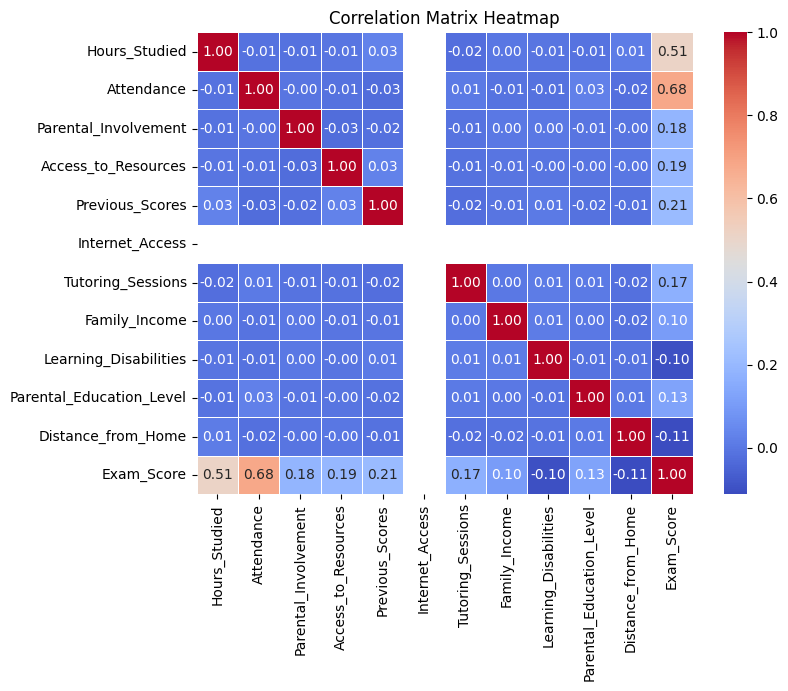

In [69]:
correlation_matrix = df.corr()
print(correlation_matrix)


# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [70]:
# for col in df.columns.to_list():
#     col_var = np.var(df[col])
#     print(f"{col}: {round(col_var,2)}")

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# model = scaler.fit(df)
# df = model.transform(df)

# df = pd.DataFrame(df, columns = ['Hours_Studied', 'Attendance', 'Parental_Involvement',
#        'Access_to_Resources', 'Previous_Scores', 'Tutoring_Sessions',
#        'Parental_Education_Level', 'Exam_Score'])

# # df["Previous_Scores"] = df["Previous_Scores"] / 15
# # df["Attendance"] = df["Attendance"] / 15
# # df["Hours_Studied"] = df["Hours_Studied"] /10
# # df["Tutoring_Sessions"] = df["Tutoring_Sessions"] / 2

# # for col in df.columns.to_list():
# #     col_var = np.var(df[col])
# #     print(f"{col}: {round(col_var,2)}")

## Selecting The Features and Target

In [71]:
y = df["Exam_Score"]
X = df.drop(["Exam_Score"], axis = 1)
print(X.columns)
print(y)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Previous_Scores', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home'],
      dtype='object')
0       67
1       61
2       74
3       71
4       70
        ..
6602    68
6603    69
6604    68
6605    68
6606    64
Name: Exam_Score, Length: 5802, dtype: int64


## Featuring Scaling 

In [72]:
print("==================== Varience Before Feature Scaling ====================\n")
for col in df.columns.to_list():
    col_var = np.var(df[col])
    print(f"{col}: {round(col_var,2)}")

from sklearn.preprocessing import StandardScaler
features = X.columns.to_list()
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


print("\n==================== Varience After Feature Scaling ====================\n")
for col in df.columns.to_list():
    col_var = np.var(df[col])
    print(f"{col}: {round(col_var,2)}")

==================== Varience Before Feature Scaling ====================

Hours_Studied: 34.47
Attendance: 133.15
Parental_Involvement: 0.48
Access_to_Resources: 0.49
Previous_Scores: 206.93
Internet_Access: 0.0
Tutoring_Sessions: 1.44
Family_Income: 0.55
Learning_Disabilities: 0.09
Parental_Education_Level: 0.61
Distance_from_Home: 0.45
Exam_Score: 10.98

==================== Varience After Feature Scaling ====================

Hours_Studied: 1.0
Attendance: 1.0
Parental_Involvement: 1.0
Access_to_Resources: 1.0
Previous_Scores: 1.0
Internet_Access: 0.0
Tutoring_Sessions: 1.0
Family_Income: 1.0
Learning_Disabilities: 1.0
Parental_Education_Level: 1.0
Distance_from_Home: 1.0
Exam_Score: 10.98


## Splitting the Features and target by 70:30

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


## Training the data using Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)


LinearRegression()

In [75]:
lr_training_score = lr.score(X_train, y_train)
lr_testing_score = lr.score(X_test, y_test)

## Training The model using Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 1)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [77]:
rf_traing_score = rf.score(X_train, y_train)
rf_testing_score = rf.score(X_test, y_test) 

## Training The model using Decision Tree Regression

In [78]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth = 5, random_state = 1)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=1)

In [79]:
dtr_training_score = dtr.score(X_train, y_train)
dtr_testing_score = dtr.score(X_test, y_test) 

## Training the model using Gradient Boosting Regressor

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [81]:
gbr_training_score = gbr.score(X_train, y_train)
gbr_testing_score = gbr.score(X_test, y_test)

## Training the model using MLP Regressor

In [82]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

In [83]:
mlp_training_score = mlp.score(X_train, y_train)
mlp_testing_score = mlp.score(X_test, y_test)

## Training the model using Lasso Regression

In [84]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [85]:
lasso_training_score = lasso.score(X_train, y_train)
lasso_testing_score = lasso.score(X_test, y_test)

## Model Comparison and Analysis

In [86]:
accuracy_train = [lr_training_score, rf_traing_score, dtr_training_score, gbr_training_score, mlp_training_score, lasso_training_score]
accuracy_test = [lr_testing_score, rf_testing_score, dtr_testing_score, gbr_testing_score, mlp_testing_score, lasso_testing_score]
label =  ["Linear Regression", "Random Forest", "Decision Tree ", "Gradient Boosting", "MLP Regressor", "Lasso Regressor"]

accuracy_show = pd.DataFrame({
    "Labels": label,
    "Accuracy in Trained Data": accuracy_train,
    "Accuracy in Test Data": accuracy_test
})

print(accuracy_show)


              Labels  Accuracy in Trained Data  Accuracy in Test Data
0  Linear Regression                  0.943547               0.943103
1      Random Forest                  0.984151               0.885262
2     Decision Tree                   0.736358               0.680487
3  Gradient Boosting                  0.940631               0.921983
4      MLP Regressor                  0.941646               0.941605
5    Lasso Regressor                  0.925217               0.924673


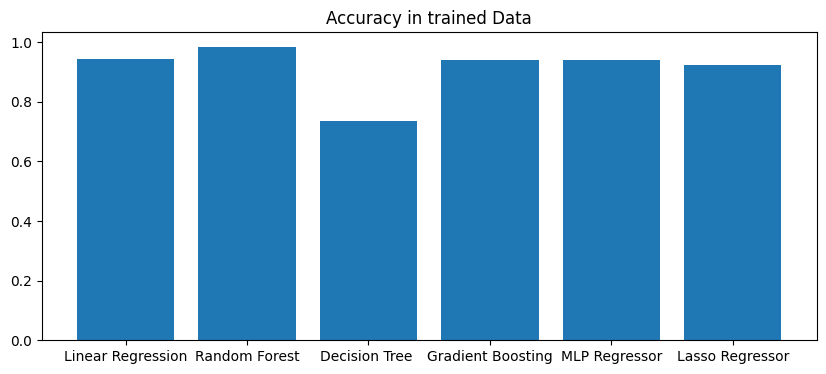

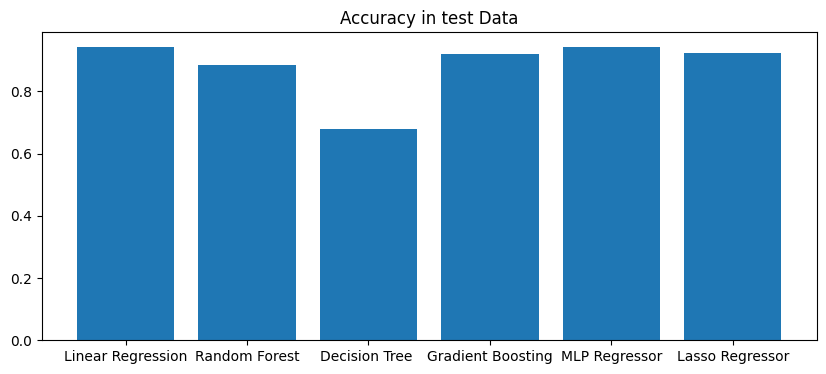

In [87]:
plt.figure(figsize = (10, 4))
plt.title("Accuracy in trained Data")
plt.bar(label, accuracy_train)
plt.show()

plt.figure(figsize = (10, 4))
plt.title("Accuracy in test Data")
plt.bar(label, accuracy_test)
plt.show()